In [22]:
import os
import json
import time
import random
import numpy as np
from datetime import datetime, timedelta
from osgeo import gdal
from matplotlib import pyplot as plt

In [23]:
DATA_ROOT_DIR = "/Volumes/X/Data/fusion-s1-s2/"

In [75]:
CROP_SIZE = 1024

In [25]:
S2_ROOT_PATH = f"{DATA_ROOT_DIR}s2/sre-10m/"
S1_ROOT_PATH = f"{DATA_ROOT_DIR}s1db/32VNH/threeband/044/"

# s2_bands = ["B02","B03","B04","B05","B06","B07","B08","B11","B12","B8A"]
s2_bands = ["B02"]

In [139]:
for s2 in os.listdir(S2_ROOT_PATH)[3:4]:
    for band in s2_bands:
        # try:
        image_path = f"{S2_ROOT_PATH}{s2}/{s2}_{band}.tif"
        image = gdal.Open(image_path)
        print(f"Processing {image_path}")

        width = image.RasterXSize
        height = image.RasterYSize

        gt = image.GetGeoTransform()

        min_x = int(gt[0])
        min_y = int(gt[3]) - 10240
        max_x = int(gt[0] + width*gt[1])
        max_y = int(gt[3] + height*gt[5]) - 10240

        x_length = range(min_x, max_x + CROP_SIZE + 1, CROP_SIZE*10)
        y_length = range(min_y, max_y - CROP_SIZE + 1, -CROP_SIZE*10)

        ALL_XY_COORDINATES = [(x, y) for y in y_length for x in x_length]

        for idx, (x, y) in enumerate(ALL_XY_COORDINATES):
            if not os.path.exists(f"data/cropped/{s2}/{s2}_{band}"):
                os.makedirs(f"data/cropped/{s2}/{s2}_{band}")
            
            vrt_options = gdal.BuildVRTOptions(resolution="highest", outputBounds=(x, y, x + CROP_SIZE * 10, y + CROP_SIZE * 10))
            gdal.BuildVRT(f"data/cropped/{s2}/{s2}_{band}/{s2}_{band}_{idx}_{x}_{y}_{CROP_SIZE}.tif", [f"{S2_ROOT_PATH}/{s2}/{s2}_{band}.tif"], options=vrt_options)
            

        # except Exception as e:
        #     print(f"Path {S2_ROOT_PATH}/{s2}/{s2}_{band}.tif doesn't exist")
        #     print(f"ERROR: {e}")

Processing /Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190108/S2_32VNH_20190108_B02.tif


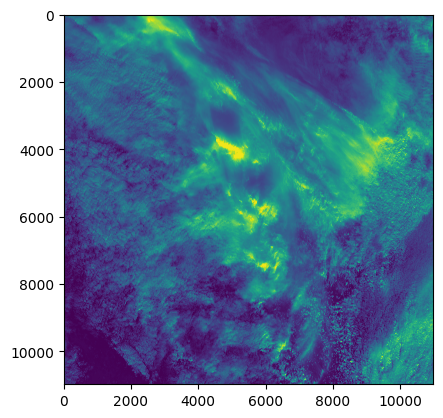

In [135]:
ori = gdal.Open(f"{S2_ROOT_PATH}S2_32VNH_20190108/S2_32VNH_20190108_B02.tif")
plt.imshow(ori.ReadAsArray())
plt.show()

121


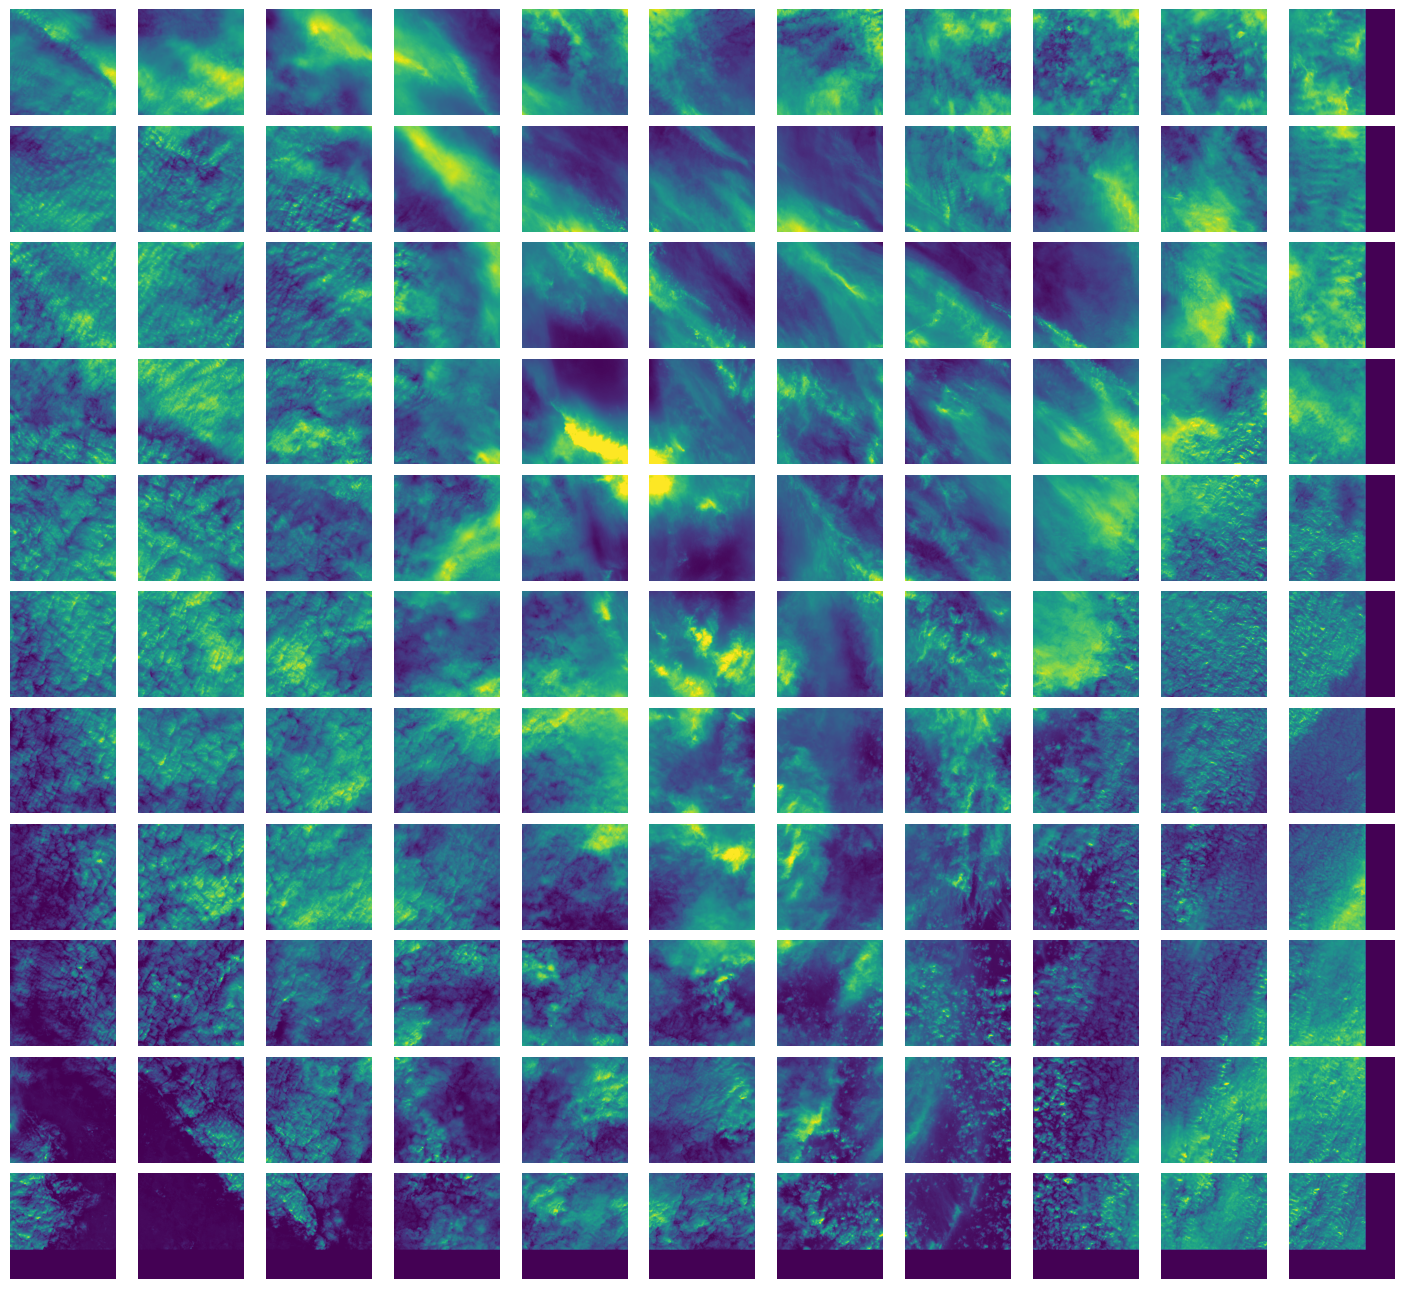

In [141]:
fig = plt.figure(figsize=(18, 18))
n_rows = 12
n_cols = 11

def sorting_key(string):
    split_string = string.split('_')
    return int(split_string[4])

print(len(os.listdir("data/cropped/S2_32VNH_20190108/S2_32VNH_20190108_B02")))
image_paths = sorted(os.listdir("data/cropped/S2_32VNH_20190108/S2_32VNH_20190108_B02"), key=sorting_key)
for idx, image_path in enumerate(image_paths):
    image = gdal.Open(f"data/cropped/S2_32VNH_20190108/S2_32VNH_20190108_B02/{image_path}")
    ax = fig.add_subplot(n_rows, n_cols, idx + 1)
    ax.imshow(image.ReadAsArray())
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()